In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("retail_store_sales.csv")
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True


# 1. Data Collection & Inspeection

In [3]:
# Almost all General Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


1. All Data Type is Correct , But Transition Date Must be Datetime data type
2. Incosistency in Discount Applied ,T , F < NAN ?
3. Minor Missing value column -->  PPUnit ,Quantity , Total Spent .
4. Major Data is Missing in Discount Applied , Item  Column 

In [4]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [5]:
missing = (df.isnull().sum() / len(df) * 100).round(2)
missing = missing[missing > 0].sort_values(ascending=False)
missing


Discount Applied    33.39
Item                 9.65
Price Per Unit       4.84
Quantity             4.80
Total Spent          4.80
dtype: float64

### Checking for inconsistency in each column

In [6]:
for col in df.columns :
    if df[col].nunique() < 20 :
        print(df[col].value_counts())
        print("-"*50)

Category
Furniture                             1591
Electric household essentials         1591
Food                                  1588
Milk Products                         1584
Butchers                              1568
Beverages                             1567
Computers and electric accessories    1558
Patisserie                            1528
Name: count, dtype: int64
--------------------------------------------------
Quantity
10.0    1232
5.0     1228
7.0     1227
8.0     1226
3.0     1224
6.0     1220
2.0     1164
4.0     1155
9.0     1148
1.0     1147
Name: count, dtype: int64
--------------------------------------------------
Payment Method
Cash              4310
Digital Wallet    4144
Credit Card       4121
Name: count, dtype: int64
--------------------------------------------------
Location
Online      6354
In-store    6221
Name: count, dtype: int64
--------------------------------------------------
Discount Applied
True     4219
False    4157
Name: count, dtype: int64
--

In [7]:
df[df.duplicated].sum() # No Whole Row is Repeted 

Transaction ID        0
Customer ID           0
Category              0
Item                  0
Price Per Unit      0.0
Quantity            0.0
Total Spent         0.0
Payment Method        0
Location              0
Transaction Date      0
Discount Applied      0
dtype: object

In [8]:
df.nunique()

Transaction ID      12575
Customer ID            25
Category                8
Item                  200
Price Per Unit         25
Quantity               10
Total Spent           227
Payment Method          3
Location                2
Transaction Date     1114
Discount Applied        2
dtype: int64

In [9]:
df[(df['Category'] == 'Patisserie') & (df['Price Per Unit'] == 20) & (df['Item'].isnull())]


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
730,TXN_8482271,CUST_23,Patisserie,NaN,20.0,NaN,NaN,Cash,Online,2022-01-05,NaN
1794,TXN_8531399,CUST_18,Patisserie,NaN,20.0,NaN,NaN,Cash,Online,2024-12-05,True
2131,TXN_8293398,CUST_19,Patisserie,NaN,20.0,NaN,NaN,Cash,Online,2024-03-29,False
4008,TXN_7354091,CUST_22,Patisserie,NaN,20.0,NaN,NaN,Digital Wallet,In-store,2024-04-28,True
10342,TXN_1208593,CUST_21,Patisserie,NaN,20.0,NaN,NaN,Credit Card,In-store,2022-11-19,NaN


In [10]:
df[(df['Price Per Unit'].isnull())]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
11,TXN_5422631,CUST_09,Milk Products,NaN,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True
17,TXN_9634894,CUST_15,Milk Products,NaN,NaN,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN
21,TXN_8685338,CUST_15,Milk Products,NaN,NaN,3.0,105.0,Credit Card,In-store,2023-10-29,NaN
32,TXN_1543244,CUST_20,Food,NaN,NaN,8.0,196.0,Credit Card,Online,2024-10-25,True
...,...,...,...,...,...,...,...,...,...,...,...
12435,TXN_5147764,CUST_01,Furniture,NaN,NaN,5.0,32.5,Credit Card,Online,2023-09-06,True
12457,TXN_1352194,CUST_17,Electric household essentials,NaN,NaN,4.0,86.0,Credit Card,Online,2023-02-26,NaN
12477,TXN_5625684,CUST_22,Computers and electric accessories,NaN,NaN,4.0,80.0,Cash,In-store,2022-11-09,True
12491,TXN_7894525,CUST_23,Butchers,NaN,NaN,1.0,26.0,Credit Card,Online,2023-01-31,True


### there is no column where all 3 of them are empty

In [11]:
df[(df['Price Per Unit'].isnull())&(df['Quantity'].isnull())&(df['Total Spent'].isnull())]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied


### Filling Price per Unit column

In [12]:
# Calculate PPU only where missing
mask_ppu = df['Price Per Unit'].isna()

df.loc[mask_ppu, 'Price Per Unit'] = (
    df.loc[mask_ppu, 'Total Spent']
    / df.loc[mask_ppu, 'Quantity']
).round(2)

# Fill Item per Transaction ID
df['Item'] = (
    df.groupby('Transaction ID')['Item']
      .transform(lambda x: x.replace('', pd.NA).ffill().bfill())
)


C:\Users\adars\AppData\Local\Temp\ipykernel_25068\81937937.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.replace('', pd.NA).ffill().bfill())


In [13]:
df['Price Per Unit'].isnull().sum()

0

In [14]:
missing = (df.isnull().sum() / len(df) * 100).round(2)
missing = missing[missing > 0].sort_values(ascending=False)
missing


Discount Applied    33.39
Item                 9.65
Quantity             4.80
Total Spent          4.80
dtype: float64

#### Now the price per unit is dealt with , now lets do the quantity

In [15]:
df[df['Total Spent'].isnull()]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
15,TXN_1809665,CUST_14,Beverages,NaN,24.5,NaN,NaN,Credit Card,In-store,2022-05-11,NaN
19,TXN_4206593,CUST_01,Furniture,NaN,35.0,NaN,NaN,Digital Wallet,Online,2025-01-13,False
25,TXN_3481599,CUST_05,Furniture,NaN,39.5,NaN,NaN,Cash,Online,2022-09-08,False
34,TXN_1621497,CUST_06,Patisserie,NaN,23.0,NaN,NaN,Cash,In-store,2023-02-18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12527,TXN_1069238,CUST_23,Food,NaN,5.0,NaN,NaN,Digital Wallet,In-store,2022-08-13,False
12552,TXN_4823896,CUST_05,Milk Products,NaN,8.0,NaN,NaN,Cash,In-store,2022-07-21,False
12556,TXN_4397672,CUST_04,Beverages,NaN,41.0,NaN,NaN,Credit Card,Online,2024-11-28,True
12562,TXN_7422454,CUST_07,Butchers,NaN,33.5,NaN,NaN,Cash,Online,2023-04-15,NaN


In [16]:
# df =df.dropna(subset="Total Spent")

In [17]:
#Derive before you drop
# Recover what is mathematically recoverable
mask_qty = df['Quantity'].notna() & df['Total Spent'].isna()
df.loc[mask_qty, 'Total Spent'] = (
    df.loc[mask_qty, 'Quantity'] * df.loc[mask_qty, 'Price Per Unit']
)

mask_total = df['Total Spent'].notna() & df['Quantity'].isna()
df.loc[mask_total, 'Quantity'] = (
    df.loc[mask_total, 'Total Spent'] / df.loc[mask_total, 'Price Per Unit']
)


In [18]:
# dont drop blindly , just label it with new column
df['data_quality'] = 'complete'
df.loc[
    df['Quantity'].isna() & df['Total Spent'].isna(),
    'data_quality'
] = 'financial_missing'


In [19]:
df[(df['Item'].isnull())]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,data_quality
5,TXN_7482416,CUST_09,Patisserie,NaN,20.0,10.0,200.0,Credit Card,Online,2023-11-30,NaN,complete
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True,financial_missing
11,TXN_5422631,CUST_09,Milk Products,NaN,6.5,8.0,52.0,Digital Wallet,In-store,2025-01-12,True,complete
15,TXN_1809665,CUST_14,Beverages,NaN,24.5,NaN,NaN,Credit Card,In-store,2022-05-11,NaN,financial_missing
17,TXN_9634894,CUST_15,Milk Products,NaN,27.5,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN,complete
...,...,...,...,...,...,...,...,...,...,...,...,...
12527,TXN_1069238,CUST_23,Food,NaN,5.0,NaN,NaN,Digital Wallet,In-store,2022-08-13,False,financial_missing
12552,TXN_4823896,CUST_05,Milk Products,NaN,8.0,NaN,NaN,Cash,In-store,2022-07-21,False,financial_missing
12556,TXN_4397672,CUST_04,Beverages,NaN,41.0,NaN,NaN,Credit Card,Online,2024-11-28,True,financial_missing
12562,TXN_7422454,CUST_07,Butchers,NaN,33.5,NaN,NaN,Cash,Online,2023-04-15,NaN,financial_missing


In [20]:
df[(df['Item'].isnull())&(((df['Price Per Unit'].isnull())&(df['Quantity'].isnull()))|((df['Total Spent'].isnull())&(df['Quantity'].isnull()))|((df['Price Per Unit'].isnull())&(df['Total Spent'].isnull())))]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,data_quality
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True,financial_missing
15,TXN_1809665,CUST_14,Beverages,NaN,24.5,NaN,NaN,Credit Card,In-store,2022-05-11,NaN,financial_missing
19,TXN_4206593,CUST_01,Furniture,NaN,35.0,NaN,NaN,Digital Wallet,Online,2025-01-13,False,financial_missing
25,TXN_3481599,CUST_05,Furniture,NaN,39.5,NaN,NaN,Cash,Online,2022-09-08,False,financial_missing
34,TXN_1621497,CUST_06,Patisserie,NaN,23.0,NaN,NaN,Cash,In-store,2023-02-18,NaN,financial_missing
...,...,...,...,...,...,...,...,...,...,...,...,...
12527,TXN_1069238,CUST_23,Food,NaN,5.0,NaN,NaN,Digital Wallet,In-store,2022-08-13,False,financial_missing
12552,TXN_4823896,CUST_05,Milk Products,NaN,8.0,NaN,NaN,Cash,In-store,2022-07-21,False,financial_missing
12556,TXN_4397672,CUST_04,Beverages,NaN,41.0,NaN,NaN,Credit Card,Online,2024-11-28,True,financial_missing
12562,TXN_7422454,CUST_07,Butchers,NaN,33.5,NaN,NaN,Cash,Online,2023-04-15,NaN,financial_missing


#### Takinng care of discount applied column , by reintroducing the sentiment of the column as discount aplied and not applied 


In [21]:
df['discount_status'] = df['Discount Applied'].map({
    True: 'applied',
    False: 'not_applied'
})

df.loc[df['Discount Applied'].isna(), 'discount_status'] = 'unknown'


# Analysis

In [22]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,data_quality,discount_status
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,complete,applied
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,complete,applied
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,complete,not_applied
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,complete,unknown
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,complete,not_applied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN,complete,unknown
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False,complete,not_applied
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN,complete,unknown
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True,complete,applied


## 1️⃣ Business performance questions (core analytics)
1. What is the total revenue over time?

2. How does revenue trend monthly / yearly?

3. Which categories generate the most revenue?

4. Which categories have high price per unit but low volume?

In [23]:
# Keeping only rows with reliable revenue values
revenue_df = df.dropna(subset=['Total Spent'])
revenue_df['Total Spent'].isnull().sum()

0

In [24]:
revenue_df['Transaction Date'] = pd.to_datetime(
    revenue_df['Transaction Date']
)


C:\Users\adars\AppData\Local\Temp\ipykernel_25068\2147421777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df['Transaction Date'] = pd.to_datetime(


#### Aggregate revenue (MONTHLY is best here)

C:\Users\adars\AppData\Local\Temp\ipykernel_25068\4004387598.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='Transaction Date', freq='M'))['Total Spent']


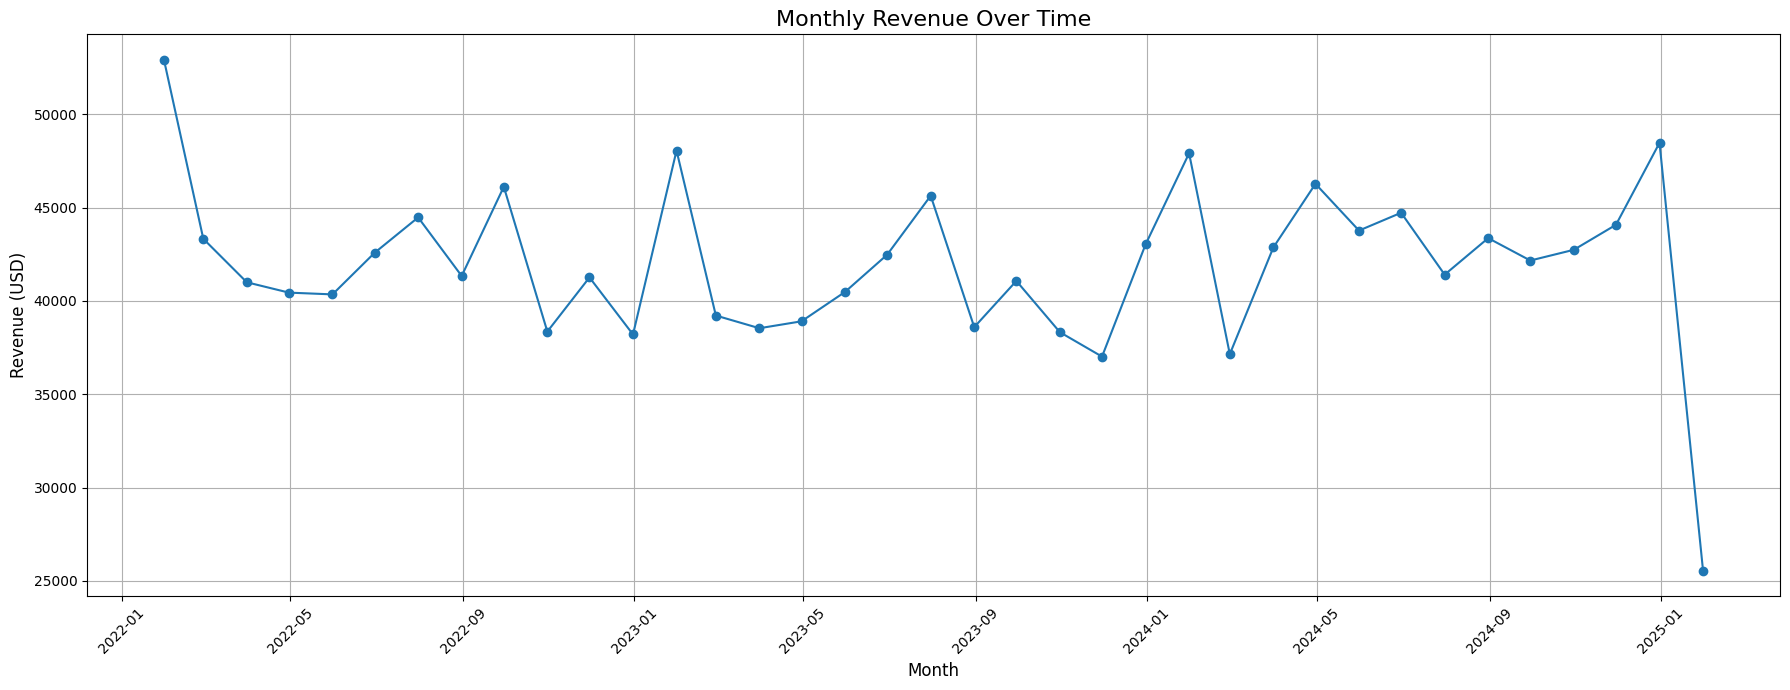

In [25]:
monthly_revenue = (
    revenue_df
    .groupby(pd.Grouper(key='Transaction Date', freq='M'))['Total Spent']
    .sum()
    .sort_index()
)

plt.figure(figsize=(18, 7))

plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')

plt.title("Monthly Revenue Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (USD)", fontsize=12)

plt.grid(True)

# Rotate x-axis labels so each month is readable
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



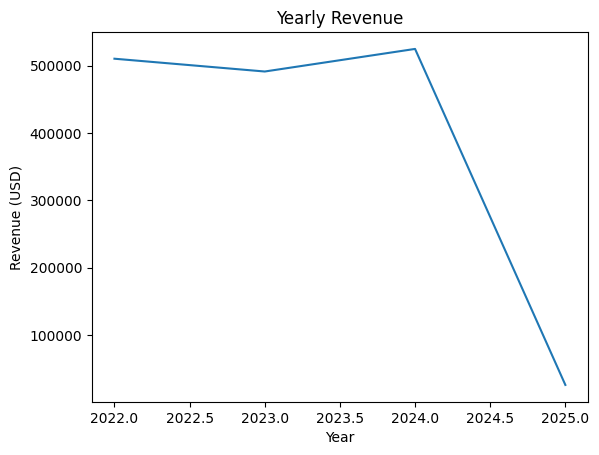

In [26]:
yearly_revenue = (
    revenue_df
    .groupby(revenue_df['Transaction Date'].dt.year)['Total Spent']
    .sum()
)

plt.plot(yearly_revenue.index, yearly_revenue.values)
plt.title("Yearly Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue (USD)")
plt.show()


In [27]:
revenue_df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,data_quality,discount_status
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,complete,applied
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,complete,applied
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,complete,not_applied
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,complete,unknown
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,complete,not_applied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN,complete,unknown
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False,complete,not_applied
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN,complete,unknown
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True,complete,applied


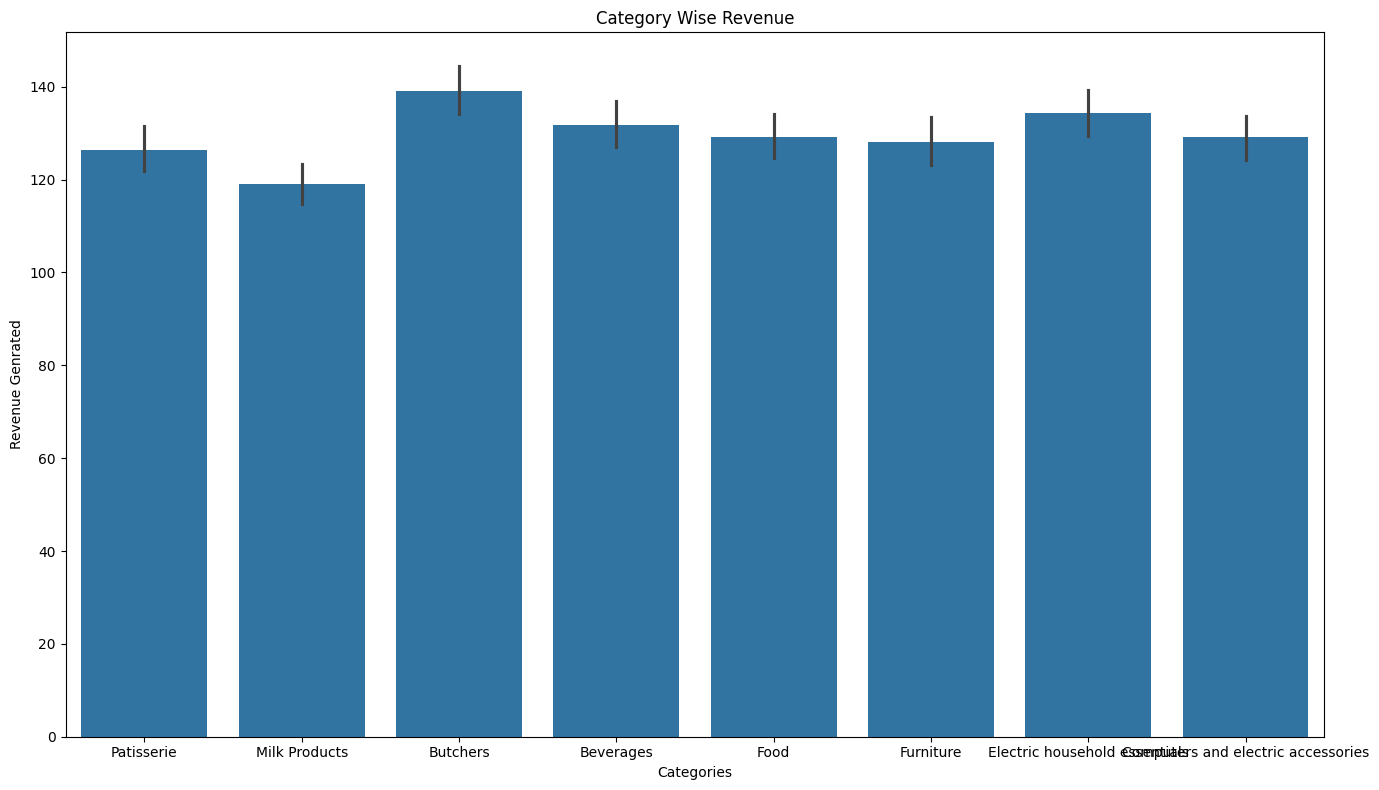

In [28]:
# Which categories generate the most revenue?
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='Category',y='Total Spent')

plt.title("Category Wise Revenue")
plt.xlabel("Categories")
plt.ylabel("Revenue Genrated")

plt.tight_layout()
plt.show()


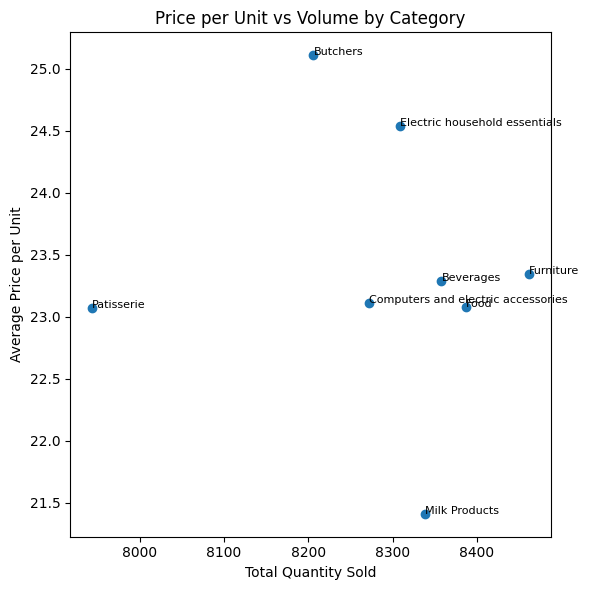

In [ ]:
# Which categories have high price per unit but low volume?
# Aggregate price and volume by category
price_volume = (
    df.groupby('Category')
      .agg({
          'Price Per Unit': 'mean',
          'Quantity': 'sum'
      })
      .reset_index()
)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(price_volume['Quantity'], price_volume['Price Per Unit'])
plt.title('Price per Unit vs Volume by Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Average Price per Unit')

# Label categories
for i, category in enumerate(price_volume['Category']):
    plt.annotate(
        category,
        (price_volume['Quantity'][i], price_volume['Price Per Unit'][i]),
        fontsize=8
    )

plt.tight_layout()
plt.show()



